In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [7]:
path_base='/home/giorgiod/MRCC_interface/alchemy_path_CO_BF/'
path_base_2='/home/giorgiod/MRCC_interface/alchemy_path_CO_BF_2/'
basis =['sto-3G','6-31G*','def2QZVPP']
fract_chargs=np.linspace(0.,1.,21)
def sub_dir(fc):
    if fc==0:
        return "/CO/"
    elif fc==1:
        return "/BF/"
    if fc<0:
            return '/'+'m'+str(int(-fc*100))+'/'
    else:
        return '/'+str(int(fc*100))+'/'

In [8]:
fract_chargs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [9]:
os.path.isdir(path_base+'/'+basis[0]+sub_dir(.25))
test_file=path_base+basis[0]+sub_dir(.25)+'run.log'

In [10]:
with open(test_file,"r") as tlog:
    tlog.read()

In [11]:
def parseglog(logf):
    with open(logf,"r") as log:
        txt=log.read()
    pos=txt.find('CCSD=')
    end=txt.find('\\',pos)
    energy=float(txt[pos+5:end])
    pos=txt.find('Hirshfeld charges with hydrogens summed into heavy atoms:')
    pos=txt.find(' C ',pos)
    cline=(txt[pos:txt.find('\n',pos)].split(' '))
    for x in cline:
        try:
            ccharge=float(x)
            break
        except:
            pass
    pos=txt.find(' O ',pos)
    oline=txt[pos:txt.find('\n',pos)].split(' ')
    for x in oline:
        try:
            ocharge=float(x)
            break
        except:
            pass
    return energy,ccharge,ocharge

In [12]:
def mullicken(logf):
    with open(logf,"r") as log:
        txt=log.read()
    pos=txt.find('Mulliken charges:')
    pos=txt.find(' C ',pos)
    cline=(txt[pos:txt.find('\n',pos)].split(' '))
    for x in cline:
        try:
            ccharge=float(x)
            break
        except:
            pass
    pos=txt.find(' O ',pos)
    oline=txt[pos:txt.find('\n',pos)].split(' ')
    for x in oline:
        try:
            ocharge=float(x)
            break
        except:
            pass
    return ccharge,ocharge 

In [13]:
def energy(bs,ap):
    return parseglog(path_base+basis[bs]+sub_dir(ap)+'run.log')[0]
def ccharge(bs,ap):
    return parseglog(path_base+basis[bs]+sub_dir(ap)+'run.log')[1]
def ocharge(bs,ap):
    return parseglog(path_base+basis[bs]+sub_dir(ap)+'run.log')[2]
def delta_charge(bs,ap):
    return ccharge(bs,ap)-ocharge(bs,ap)
def cmull(bs,ap):
    return mullicken(path_base+basis[bs]+sub_dir(ap)+'run.log')[0]
def omull(bs,ap):
    return mullicken(path_base+basis[bs]+sub_dir(ap)+'run.log')[1]
def delta_mull(bs,ap):
    return cmull(bs,ap)-omull(bs,ap)

In [14]:
def energy_2(bs,ap):
    return parseglog(path_base_2+basis[bs]+sub_dir(ap)+'run.log')[0]
def ccharge_2(bs,ap):
    return parseglog(path_base_2+basis[bs]+sub_dir(ap)+'run.log')[1]
def ocharge_2(bs,ap):
    return parseglog(path_base_2+basis[bs]+sub_dir(ap)+'run.log')[2]
def delta_charge_2(bs,ap):
    return ccharge_2(bs,ap)-ocharge_2(bs,ap)

In [15]:
def alc_pred(ref_pts,dl,o=4):   
    dh=0.05
    coeff0=np.asarray([0,0,1.,0,0])
    coeff1=np.asarray([1/12,-2/3,0,2/3,-1/12])
    coeff2=np.asarray([-1/12 , 4/3 , -5/2 , 4/3 , -1/12])
    coeff3=np.asarray([-1/2 , 1 , 0 , -1 , 1/2])
    coeff4=np.asarray([1 ,-4 , 6 ,-4 , 1])
    coeff_list=[coeff1,coeff2,coeff3,coeff4]
    coeff_exp=coeff0.copy()
    for x in range(1,o+1):
        coeff_exp+=coeff_list[x-1]*(float(dl)/dh)**x/np.math.factorial(x)
    print (ref_pts)
    print (np.sum(ref_pts*coeff0),np.sum(ref_pts*coeff1),np.sum(ref_pts*coeff2),np.sum(ref_pts*coeff3),np.sum(ref_pts*coeff4)) 
    return np.sum(ref_pts*coeff_exp)

In [16]:
alc_pred(np.asarray([cmull(0,ap) for ap in [-0.1,-0.05,0.0,0.05,0.1]]),1,3),\
cmull(0,1.)

[-0.049717 -0.001558  0.045474  0.091422  0.136397]
0.045474 0.046477166666666674 -0.0010896666666666641 7.699999999999374e-05 6.799999999995698e-05


(0.8597506666666561, 0.693332)

In [17]:
energy(2,1.)

-124.4475994

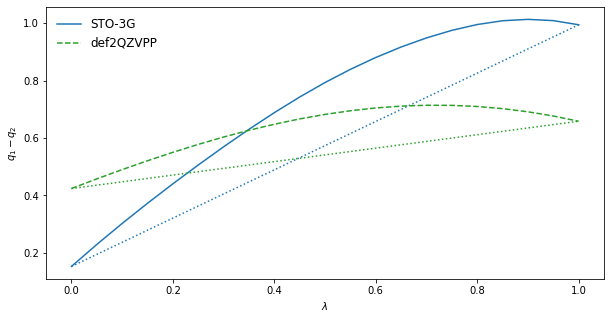

Text(0.5, 0, '$ \\lambda $ ')

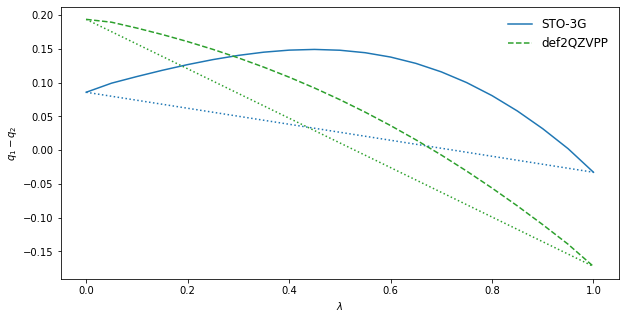

In [36]:
plt.figure(figsize=(10,5))
plt.plot(fract_chargs,[delta_charge(0,x) for x in fract_chargs],color='C0',label='STO-3G')
plt.plot([0,1],[delta_charge(0,x) for x in [0,1]],':',color='C0')
#plt.plot(fract_chargs,[delta_charge(1,x) for x in fract_chargs],'-.',color='C1',label=basis[1])
plt.plot(fract_chargs,[delta_charge(2,x) for x in fract_chargs],'--',color='C2',label=basis[2])
plt.plot([0,1],[delta_charge(2,x) for x in [0,1]],':',color='C2')
plt.legend(edgecolor='white',loc=2,fontsize=12)
plt.ylabel('$q_1-q_2 $')
plt.xlabel('$ \lambda $ ')
plt.show()
#plt.savefig('HC_COtoBF_3e1bohr.png')
plt.figure(figsize=(10,5))
plt.plot(fract_chargs,[delta_charge_2(0,x) for x in fract_chargs],color='C0',label='STO-3G')
plt.plot([0,1],[delta_charge_2(0,x) for x in [0,1]],':',color='C0')
#plt.plot(fract_chargs,[delta_charge(1,x) for x in fract_chargs],'-.',color='C1',label=basis[1])
plt.plot(fract_chargs,[delta_charge_2(2,x) for x in fract_chargs],'--',color='C2',label=basis[2])
plt.plot([0,1],[delta_charge_2(2,x) for x in [0,1]],':',color='C2')
plt.legend(edgecolor='white',loc=0,fontsize=12)
plt.ylabel('$q_1-q_2 $')
plt.xlabel('$ \lambda $ ')

Text(0, 0.5, 'total energy')

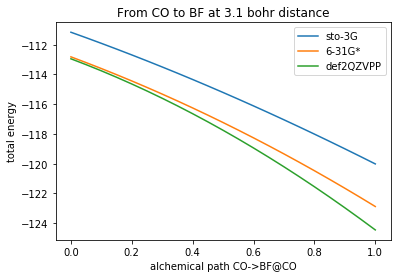

In [19]:
plt.plot(fract_chargs,[energy(0,x) for x in fract_chargs],color='C0',label=basis[0])
plt.plot(fract_chargs,[energy(1,x) for x in fract_chargs],color='C1',label=basis[1])
plt.plot(fract_chargs,[energy(2,x) for x in fract_chargs],color='C2',label=basis[2])
plt.legend()
plt.title("From CO to BF at 3.1 bohr distance")
plt.xlabel('alchemical path CO->BF@CO')
plt.ylabel('total energy')
#plt.savefig('En_COtoBF_3e1bohr.png') 